
# LOAD SEM1 DATASET

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
mod1_encoded_sem1 = pd.read_csv('mod1_encoded_sem1.csv')

In [4]:
mod1_encoded_sem1.head()

,LEARNING STYLE,PROGRAM,YEAR,RACE,GENDER,RELIGION,STATE,REGION,INCOME,DEPENDENTS,SCHOOL,SPM ADDMATH,SPM PHY,SPM CHEM,SPM BIO,SEM1 CGPA
0,0,1,1,3,0,2,1,1,6,6,1,6,5,5,3,1
1,0,1,2,3,0,2,1,0,1,6,1,5,4,6,5,1
2,0,1,1,3,0,2,1,1,7,2,1,7,2,4,5,1
3,0,1,2,3,0,2,8,2,2,6,1,5,3,6,4,2
4,0,1,2,3,0,2,1,2,3,4,1,3,4,6,5,1


In [5]:
mod1_encoded_sem1.columns

Index(['LEARNING STYLE', 'PROGRAM', 'YEAR', 'RACE', 'GENDER', 'RELIGION',
       'STATE', 'REGION', 'INCOME', 'DEPENDENTS', 'SCHOOL', 'SPM ADDMATH',
       'SPM PHY', 'SPM CHEM', 'SPM BIO', 'SEM1 CGPA'],
      dtype='object')

In [6]:
mod1_encoded_sem1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LEARNING STYLE  1241 non-null   int64
 1   PROGRAM         1241 non-null   int64
 2   YEAR            1241 non-null   int64
 3   RACE            1241 non-null   int64
 4   GENDER          1241 non-null   int64
 5   RELIGION        1241 non-null   int64
 6   STATE           1241 non-null   int64
 7   REGION          1241 non-null   int64
 8   INCOME          1241 non-null   int64
 9   DEPENDENTS      1241 non-null   int64
 10  SCHOOL          1241 non-null   int64
 11  SPM ADDMATH     1241 non-null   int64
 12  SPM PHY         1241 non-null   int64
 13  SPM CHEM        1241 non-null   int64
 14  SPM BIO         1241 non-null   int64
 15  SEM1 CGPA       1241 non-null   int64
dtypes: int64(16)
memory usage: 155.2 KB


# CREATE TRAIN_TEST_SPLIT

In [7]:
## CREATE TRAIN TEST SPLIT TO AVOID OVERFITTING
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(mod1_encoded_sem1.drop(labels=['SEM1 CGPA'],axis=1),
                                                 mod1_encoded_sem1['SEM1 CGPA'],test_size=0.3,random_state=0)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 959 to 684
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LEARNING STYLE  868 non-null    int64
 1   PROGRAM         868 non-null    int64
 2   YEAR            868 non-null    int64
 3   RACE            868 non-null    int64
 4   GENDER          868 non-null    int64
 5   RELIGION        868 non-null    int64
 6   STATE           868 non-null    int64
 7   REGION          868 non-null    int64
 8   INCOME          868 non-null    int64
 9   DEPENDENTS      868 non-null    int64
 10  SCHOOL          868 non-null    int64
 11  SPM ADDMATH     868 non-null    int64
 12  SPM PHY         868 non-null    int64
 13  SPM CHEM        868 non-null    int64
 14  SPM BIO         868 non-null    int64
dtypes: int64(15)
memory usage: 108.5 KB


In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 1031 to 825
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LEARNING STYLE  373 non-null    int64
 1   PROGRAM         373 non-null    int64
 2   YEAR            373 non-null    int64
 3   RACE            373 non-null    int64
 4   GENDER          373 non-null    int64
 5   RELIGION        373 non-null    int64
 6   STATE           373 non-null    int64
 7   REGION          373 non-null    int64
 8   INCOME          373 non-null    int64
 9   DEPENDENTS      373 non-null    int64
 10  SCHOOL          373 non-null    int64
 11  SPM ADDMATH     373 non-null    int64
 12  SPM PHY         373 non-null    int64
 13  SPM CHEM        373 non-null    int64
 14  SPM BIO         373 non-null    int64
dtypes: int64(15)
memory usage: 46.6 KB


# 1. FEATURE SELECTION : MUTUAL INFO

In [10]:
from sklearn.feature_selection import mutual_info_classif
## DETERMINE THE MUTUAL INFORMATION
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.01998106, 0.01677222, 0.02898225, 0.1071341 , 0.00691804,
       0.07348033, 0.04941135, 0.00507943, 0.04136001, 0.02897703,
       0.00719431, 0.10056153, 0.05145752, 0.08646987, 0.08692144])

In [11]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

RACE              0.107134
SPM ADDMATH       0.100562
SPM BIO           0.086921
SPM CHEM          0.086470
RELIGION          0.073480
SPM PHY           0.051458
STATE             0.049411
INCOME            0.041360
YEAR              0.028982
DEPENDENTS        0.028977
LEARNING STYLE    0.019981
PROGRAM           0.016772
SCHOOL            0.007194
GENDER            0.006918
REGION            0.005079
dtype: float64

<AxesSubplot:>

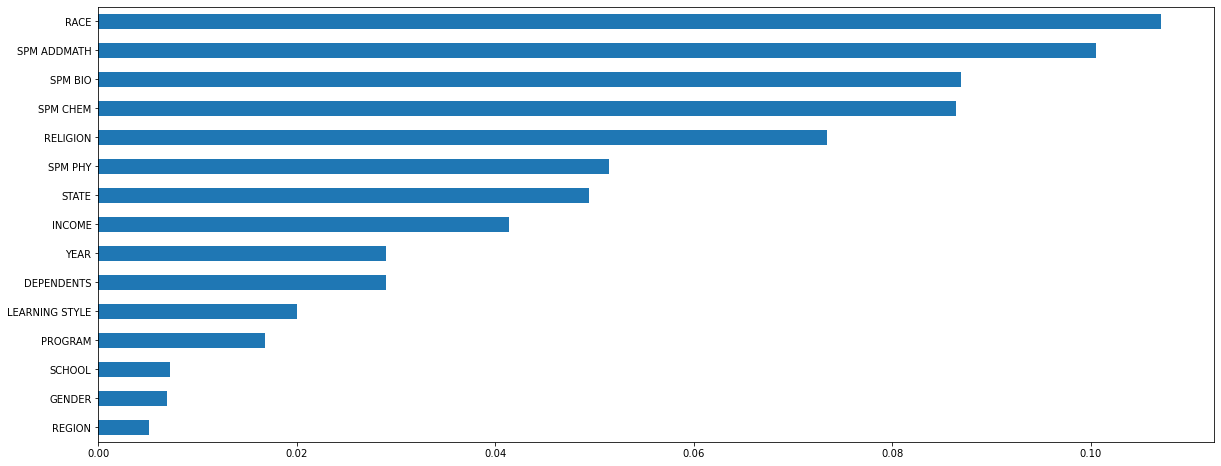

In [12]:
mutual_info.sort_values(ascending=True).plot.barh(figsize=(20,8))

# 2. FEATURE SELECTION : CHI SQUARED TEST

In [13]:
## PERFORM CHI2 TEST
from sklearn.feature_selection import chi2
f_p_values = chi2(X_train,y_train)
f_p_values
## CHI2 RETURNS TWO VALUES : FSCORE & P-VALUE
## HIGHER FSCORE MEANS THE FEATURE IS MORE IMPORTANT 
## LOWER P-VALUE MEANS THE FEATURE IS MORE IMPORTANT

(array([  7.28870939,  12.38256331,   4.54047066,  29.18198059,
          6.27269495,  16.57730109, 119.27690488,   9.4822679 ,
         17.55562485,   2.05730025,   3.40962498, 150.46095427,
        102.77471667, 128.56941311,  96.65703506]),
 array([1.21395404e-01, 1.47220009e-02, 3.37775643e-01, 7.17938315e-06,
        1.79687809e-01, 2.33473413e-03, 7.62249776e-25, 5.01128805e-02,
        1.50690614e-03, 7.25220512e-01, 4.91752420e-01, 1.62161423e-31,
        2.52336651e-21, 7.87622528e-27, 5.06162051e-20]))

In [14]:
f_scores = pd.Series(f_p_values[0])
f_scores.index = X_train.columns
f_scores.sort_values(ascending=False)

SPM ADDMATH       150.460954
SPM CHEM          128.569413
STATE             119.276905
SPM PHY           102.774717
SPM BIO            96.657035
RACE               29.181981
INCOME             17.555625
RELIGION           16.577301
PROGRAM            12.382563
REGION              9.482268
LEARNING STYLE      7.288709
GENDER              6.272695
YEAR                4.540471
SCHOOL              3.409625
DEPENDENTS          2.057300
dtype: float64

<AxesSubplot:>

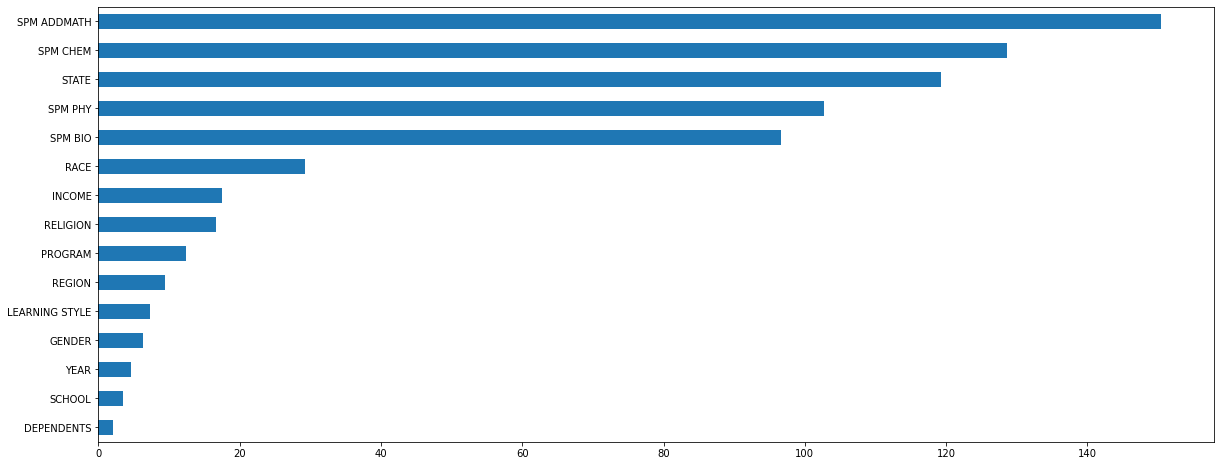

In [16]:
f_scores.sort_values(ascending=True).plot.barh(figsize=(20,8))

In [17]:
## OBSERVATION
# SPM ADDMATH IS THE MOST IMPORTANT COLUMN (HIGHEST F-SCORE) WHEN COMPARED TO THE OUTPUT FEATURE (TARGET) SEM1 CGPA